

# Project: No-show appointments Dataset 


##### A person makes a doctor appointment, receives all the instructions and no-show. Who to blame? 
So in this project I have  dataset of appoinment records for Brasil public hospitals and I will Discuss if patients will  show or not show up to appointments. and If they do not attend what factors affect that on.


Greetings!


## Data description

1- PatientId  > (Identification of a patient)

2- AppointmentID > (identification of each appointment)
 
3- Gender > 'F' if female or 'M' if man

4- DataMarcacaoConsulta > The day of the actuall appointment, when they have to visit the doctor.

5- DataAgendamento > The day someone called or registered the appointment, this is before appointment of course.

6- Age > How old is the patient.

7- Neighbourhood >  location of the hospital

8- Scholarship  > indicates whether or not the patient is enrolled in Brazilian welfare program Bolsa Família

9- Hipertension >  the patient has hipertension or not

10- Diabetes > the patient has diabetes or not

11- Alcoholism > the patient is an alcoholic or not 

12- Handcap > the patient is handicaped or not 

13- SMS_received > 1 or more messages sent to the patient.

14- No-show > ‘No’ if the patient showed up to their appointment, and ‘Yes’ if they did not show up

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

<a id='wrangling'></a>


#### First  I will read the file 

In [2]:
data = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')

In [3]:
data.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [4]:
data.tail()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
110522,2.572134e+12,5651768,F,2016-05-03T09:15:35Z,2016-06-07T00:00:00Z,56,MARIA ORTIZ,0,0,0,0,0,1,No
110523,3.596266e+12,5650093,F,2016-05-03T07:27:33Z,2016-06-07T00:00:00Z,51,MARIA ORTIZ,0,0,0,0,0,1,No
110524,1.557663e+13,5630692,F,2016-04-27T16:03:52Z,2016-06-07T00:00:00Z,21,MARIA ORTIZ,0,0,0,0,0,1,No
110525,9.213493e+13,5630323,F,2016-04-27T15:09:23Z,2016-06-07T00:00:00Z,38,MARIA ORTIZ,0,0,0,0,0,1,No
110526,3.775115e+14,5629448,F,2016-04-27T13:30:56Z,2016-06-07T00:00:00Z,54,MARIA ORTIZ,0,0,0,0,0,1,No


## 1) check the null value 

In [5]:
data.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

I found there is no any null value 

## 2) check the duplicate value

In [6]:
data.duplicated().sum()

0

In [7]:
data.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [8]:
data.shape

(110527, 14)

## get information about the data 

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


##### ckeck if there ant '?' value and replace to null

In [10]:
data.replace("?", np.nan, inplace = True)

In [11]:
data.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

#### conver the ScheduledDay and AppointmentDay to datetime

In [12]:
data['ScheduledDay']= pd.to_datetime(data['ScheduledDay'])
data.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [13]:
data['AppointmentDay']= pd.to_datetime(data['AppointmentDay'])
data.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No


#### conver All columns into lower case

In [14]:
data.columns= data.columns.str.lower()
data.head()

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no-show
0,2.987250e+13,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No


#### knows the unique value in each coulmns

In [15]:
print("--------------")
print(data["gender"].unique())
print("--------------")
print(data["scholarship"].unique())
print("--------------")
print(data["no-show"].unique())
print("--------------")
print(data["hipertension"].unique())
print("--------------")
print(data["diabetes"].unique())
print("--------------")
print(data["alcoholism"].unique())
print("--------------")
print(data["handcap"].unique())
print("--------------")
print(data["sms_received"].unique())

--------------
['F' 'M']
--------------
[0 1]
--------------
['No' 'Yes']
--------------
[1 0]
--------------
[0 1]
--------------
[0 1]
--------------
[0 1 2 3 4]
--------------
[0 1]


In my description I found that in my data there is a -1 age and this is impossible. I will know the number and delete it

In [16]:
data[data['age']<0].count().sum()

14

In [17]:
data.drop([99832],axis=0,inplace=True)

Ckeck 

In [18]:
data[data['age']<0].count().sum()

0

I will ckeck outlier

115
0


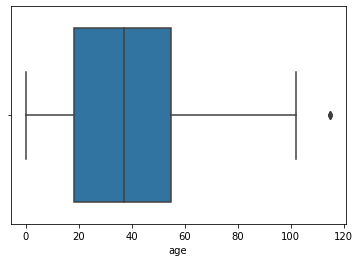

In [19]:
print(data['age'].max())
print(data['age'].min())
sns.boxplot(data['age']);

 All age >102 seems outler and Logically, there are no people over the age of 102 SO I will remove all age >102 and <1

In [20]:
data.drop(data[(data['age'] > 102) |(data['age'] < 1)].index, inplace = True)

Ckeck

In [21]:
data[data['age']>102].count().sum()

0

In [22]:
data[data['age']<1].count().sum()

0

Hisdtgram for my data to understand more

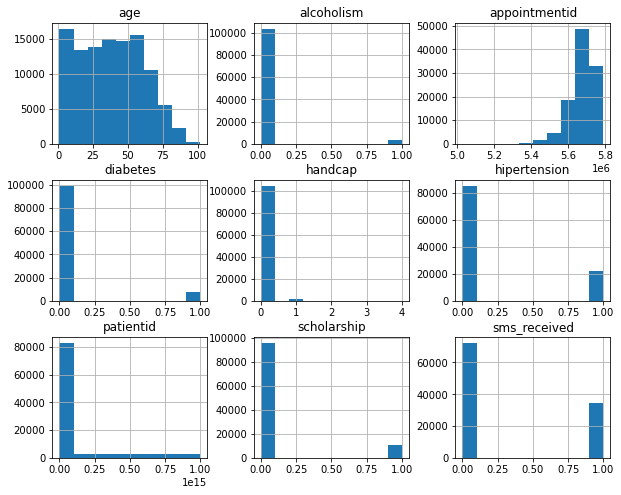

In [23]:
data.hist(figsize=(10,8));

#### I will see how many there are patients of each age

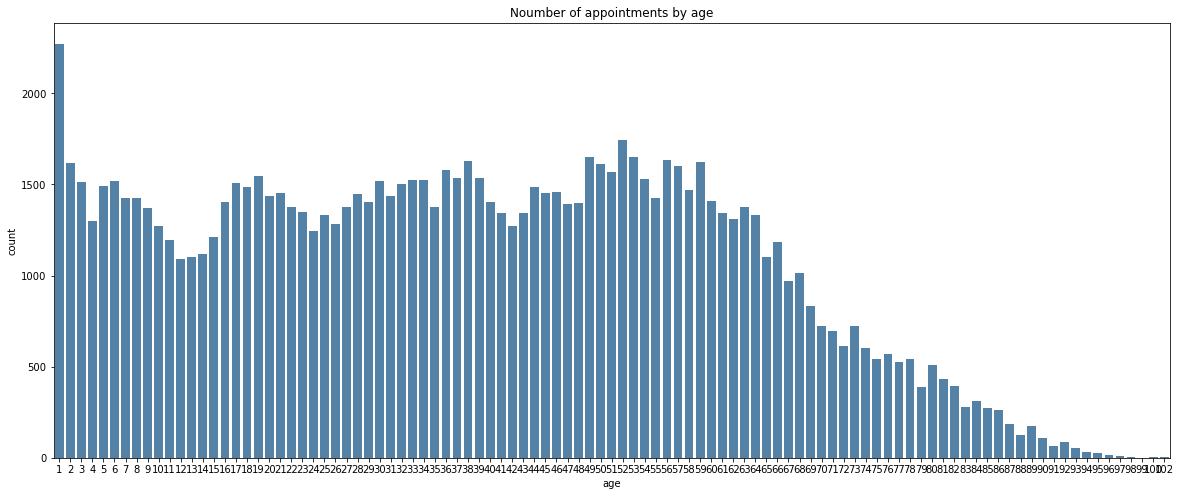

In [24]:
plt.figure(figsize=(20,8))
a2 = sns.countplot(x=data.age,color='steelblue')
a2.set_title("Noumber of appointments by age")
plt.show()

As we see people with age 1 has more appointment and that seems interesting. also people with age 52 also has more appointment. after age 52 we see a right-skewed distribution.

,mean,std
gender,,
F,39.843824,21.551676
M,35.400418,23.824998


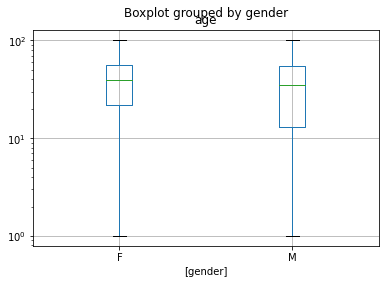

In [62]:
data.boxplot(column=['age'],by=['gender']).set_yscale('log')
pd.DataFrame(data.groupby(['gender'])['age'].describe().loc[:,['mean','std']])

we can see the mean of femal is better then male 

### Q1 what of range of age, who has more appointments?

,age
count,106982.000000
mean,38.312501
std,22.460622
min,1.000000
25%,19.000000
50%,38.000000
75%,56.000000
max,102.000000


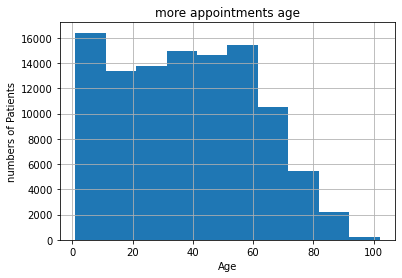

In [25]:
dataAge=data['age'].hist();
dataAge.set_title('more appointments age');
dataAge.set_xlabel('Age');
dataAge.set_ylabel('numbers of Patients');
pd.DataFrame(data['age'].describe())

##### As we show the 50% of age has appointnments is in age 38 

### Q1 How many percent of patients attended their scheduled appointment

In [26]:
data.groupby(['no-show'])[['patientid']].count()

,patientid
no-show,
No,85305
Yes,21677


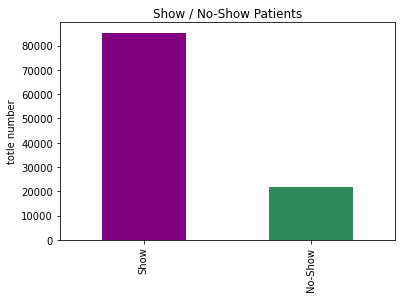

In [27]:
gender = data['no-show'].value_counts().plot.bar(color=('purple','seagreen'));
gender.set_title("Show / No-Show Patients")
gender.set_xticklabels(["Show", "No-Show"]);
gender.set_ylabel("totle number");
plt.show();


"No" means the patient showed up to their appointment, we can see those who attend their appointments is (85305) are much more than those who do not (21677) and this is good.

# Q2 Are the patients more male or female?

We can see the Femal patients is more then male 

,patientid
gender,
F,70113
M,36869


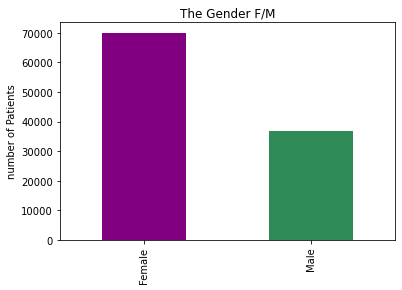

In [28]:
gender = data['gender'].value_counts().plot.bar(color=('purple','seagreen'));
gender.set_xticklabels(["Female", "Male"]);
gender.set_ylabel("number of Patients");
gender.set_title('The Gender F/M');
data.groupby(['gender'])[['patientid']].count()

The gender that comes to their appointment most of the time is female, on average 70113

# Q3 Who went most to their appointments with diabetes

no-show
gender diabetes          
F      0         0.794518
       1         0.818587
M      0         0.797521
       1         0.823278

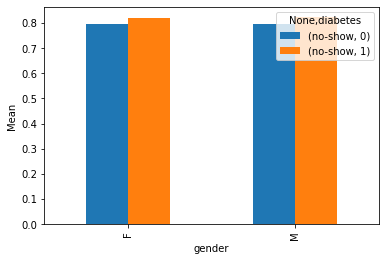

In [54]:
data["no-show"]=pd.get_dummies(data["no-show"]);
data.groupby(['gender','diabetes'])[["no-show"]].mean().unstack().plot(kind='bar').set_ylabel('Mean');
data.groupby(['gender','diabetes'])[["no-show"]].mean()

As we see There is no significant difference between males and females and have diabetes On the one hand no-show

## Conclusions




I work with this datasets and I managed a some problem For-example 

1- unifying names with lower case.

2-investigated most of independent variables in the dataset.

3- check outlet and remove ages that are not possible.

4-do histogram for data to understand more.

5- ckeck null value and duplicate value.

## The most important findings are:

There are many very young people in the dataset most of them of age 1 but in general the patients age is distributed evenly and the number of patients goes drastricly down for patients older than 52 years.
 I found that women suffer from high blood pressure, diabetes, and alcoholism, and have morehead than males. Females also have a "scholarship" form registered with the Brazilian welfare program Bolsa Família.This explains the reason for why female has appointments > male. The patients are 37 years on average. 25% of patients are below 18 and most of them are below 55.
I concluded that those who go to the appointment regularly are the people who suffer from more than one disease problems.
## Limitations

1- I found the results of a dataset for common no-show appointments, but the analysis would have been more helpful if the data had details about appointments for each year.

2-There are a lot of things that might help in the dataset, such as "Is the patient in Brazil?"
